## Heart disease classification

This notebook is all about building a machine learning classification model for predicting whether or not a patient has heart-disease.

The tools used for data analysis and exploration are:

* Numpy
* Pandas
* Matplotlib

For building the machine learning model I am using **Scikit-Learn 0.22**.

### Situation

Given 14 different clinical features of a patient, is it possible to predict whether or not this patient has heart-disease with an accuracy of more than 95%?

### Data

The data I will be using is from [kaggle](https://www.kaggle.com/ronitf/heart-disease-uci).
The original dataset from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) contained way more than 14 features.

However, we're going to use the following 14 features to make predictions.

**Features:**

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 

**Target variable:**

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Evaluation

**What defines success?**

The goal is to predict whether or not a patient has heart-disease with more than 85% accuracy.


### Tools used

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Needed modules for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [8]:
#Make sure the plots are executed within the notebook
%matplotlib inline

In [9]:
#Models that could fit for our classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [10]:
#Evaluation tools
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

### Data analysis and exploration

In [13]:
#Load the data
df = pd.read_csv("../data/heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [10]:
#How many patients are in the dataset
len(df)

303

In [19]:
#How many patients with/without heart-disease
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

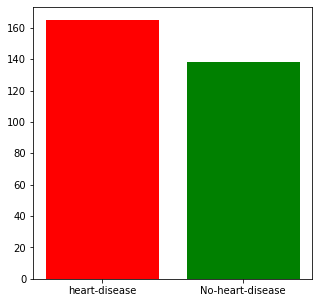

In [29]:
#Show these numbers visually
plt.figure(figsize=(5,5))
plt.bar(["heart-disease", "No-heart-disease"],df["target"].value_counts(), color=["red", "green"]);

In [14]:
#What datatypes are in the dataset
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [17]:
#Are there missing values in the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
#Look at some keymetrics of the dataset
df.drop("target", axis=1).describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Trying to find patterns in feature - target relation

How are the gender of a patient and his diagnosis related?

In [34]:
# sex-feature relation to target
sex_target_relation = pd.crosstab( df["target"], df["sex"])
sex_target_relation

sex,0,1
target,,
0,24,114
1,72,93


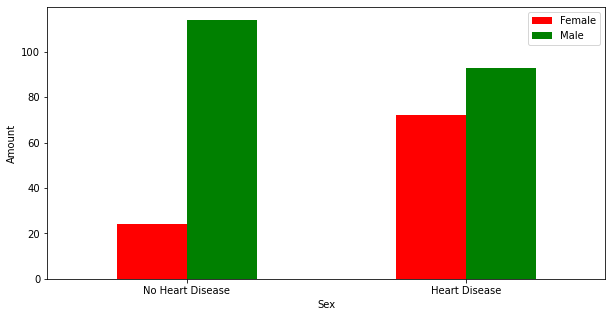

In [46]:
#Create a heatmap to visualize the above relation
sex_target_relation.plot(figsize=(10,5),kind="bar", color=["red", "green"]);
plt.xticks([0,1],["No Heart Disease","Heart Disease"], rotation=0)
plt.ylabel("Amount")
plt.xlabel("Sex")
plt.legend(["Female","Male"]);

How are the maximum heart rate and the age related?

In [73]:
#thalach-feature relation age-feature
thalach_age_relation = df[["thalach","age","target"]]
thalach_age_relation

,thalach,age,target
0,150,63,1
1,187,37,1
2,172,41,1
3,178,56,1
4,163,57,1
...,...,...,...
298,123,57,0
299,132,45,0
300,141,68,0
301,115,57,0


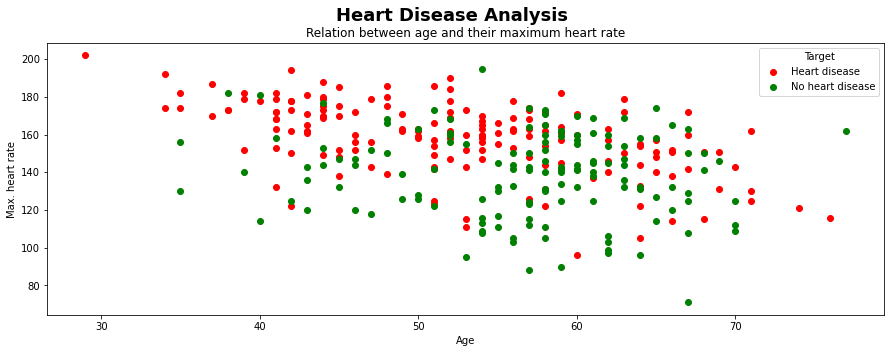

In [86]:
#visualize the above relation
fig, ax1 = plt.subplots(figsize=(15,5),
                              nrows=1,
                              ncols=1)

positive_patients = thalach_age_relation[thalach_age_relation["target"] == 1]
negative_patients = thalach_age_relation[thalach_age_relation["target"] == 0]

#Plotting the positive patients' age against there thalach level
scatter = ax1.scatter(positive_patients["age"], positive_patients["thalach"],c="red")

#Plotting the negative patients' age against there thalach level
scatter = ax1.scatter(negative_patients["age"], negative_patients["thalach"], c="green")

ax1.set(title="Relation between age and their maximum heart rate",
        xlabel="Age",
        ylabel="Max. heart rate");

ax1.legend(scatter.legend_elements(),labels=["Heart disease","No heart disease"],title="Target")

fig.suptitle("Heart Disease Analysis", fontsize=18, fontweight="bold");

The normal distribution of features is a good indicator to see if we have some outlier/special data, we have to deal with,
before feeding the machine-learning algorithm with the data.

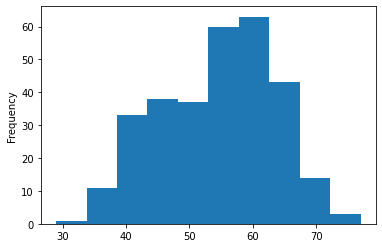

In [203]:
#Let's have a look at the age distribution in the histogram
df["age"].plot(kind="hist");

How are the chest pain of patients and his diagnosis related?

In [206]:
relation_chestpain_target = pd.crosstab(df["cp"], df["target"])
relation_chestpain_target

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


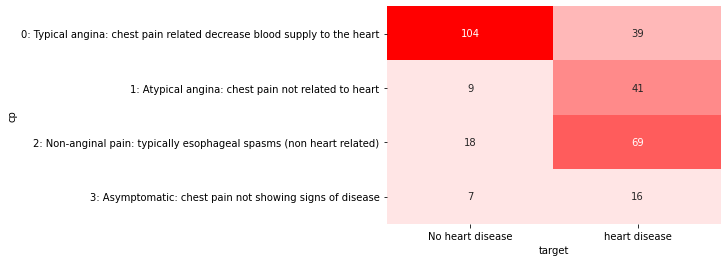

In [223]:
#Make it visual
sns.heatmap(relation_chestpain_target, cbar=False, annot=True, cmap=sns.light_palette("red"), 
            yticklabels=["0: Typical angina: chest pain related decrease blood supply to the heart", 
                   "1: Atypical angina: chest pain not related to heart",
                   "2: Non-anginal pain: typically esophageal spasms (non heart related)", 
                   "3: Asymptomatic: chest pain not showing signs of disease"],
            xticklabels=["No heart disease", "heart disease"], fmt="g");




In [225]:
# Make a correlation matrix
correlation_matrix = df.corr()

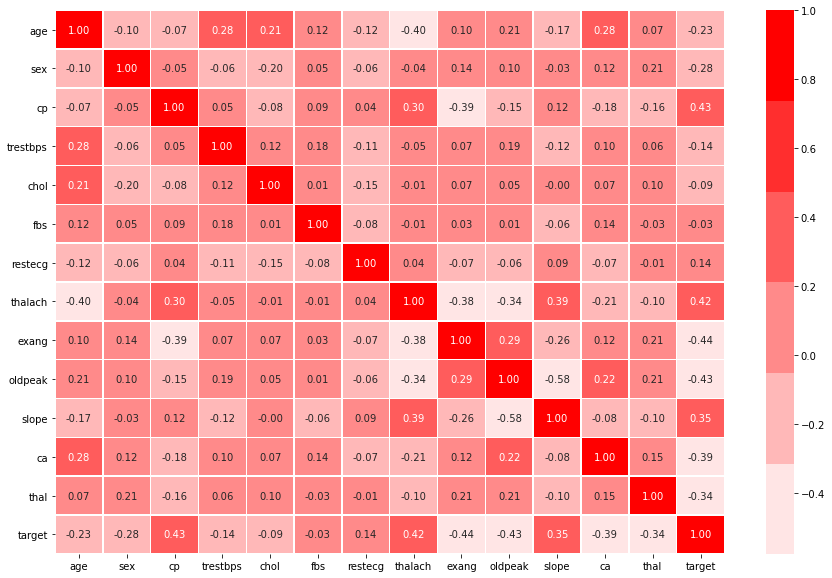

In [228]:
#Visualize it using a heatmap
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap=sns.light_palette("red")
                )

### 5.Modelling the binary classifier

In [14]:
#Split the data into x(features) and y(target variable)

x = df.drop("target", axis=1)
y = df["target"]

#split the data into training-set and test-set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#check the size of the sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

We will try three different models as baseline models and see which one's the best

* Logistic Regression
* K-Nearest Neighbors
* Random Forest Classifier

In [14]:
baseline_models = {"Logistic Regression": LogisticRegression(),
                   "K-Nearest-Neighbors": KNeighborsClassifier(),
                   "Random Forest Classifier": RandomForestClassifier(),
                   "SVC": SVC(),
                   "LinearSVC": LinearSVC()}

In [15]:
def fit_eval_plot_model(models, x, y):
    
    """
    Every model from the models dictionary are fit to the training set, evaluated on the 
    test set and their accuacy score plotted to compare them.
    
    models = dictionary that contains machine-learning model instances
    x_train = the feature values of the training set
    y_train = the target label of the training set
    x_test = the feature values of the test set
    y_test = the target label of the test set
    """
    
    #set random seed for replication purposes
    np.random.seed(42)
    scores = {}

    for modelname, model in baseline_models.items():
        model.fit(x_train, y_train)
        scores[modelname] = np.mean(cross_val_score(model, x, y, scoring="accuracy", cv=5))
    
    print_scores(scores)
    scores = pd.Series(scores)
    scores.plot(kind="bar");

In [16]:
def print_scores(scores):
    """
    prints out the scores of machine-learning models in a given dictionary.
    
    scores = dicitonary that contains a machine-learning-model name as a key and it's accuracy score as the value.
    """
    for modelname,score in scores.items():
        print(f"{modelname}: {score *100 :.2f}%")
    

Logistic Regression: 83.15%
K-Nearest-Neighbors: 64.39%
Random Forest Classifier: 82.15%
SVC: 64.35%
LinearSVC: 71.95%


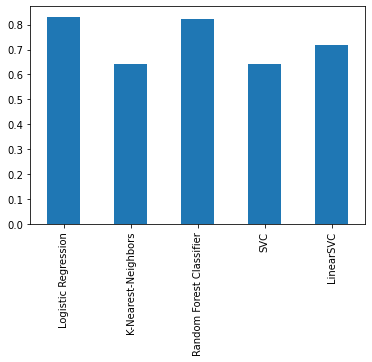

In [17]:
#Let's use them
fit_eval_plot_model(baseline_models, x, y)

The three lowest performing baseline models are kicked out.

As there is now a baseline score for each baseline - model, hyperparameter tuning is next.

### Hyperparameter tuning
#### Logistic Regression

In [20]:
#Get default hyperparameter-values of logistic-regression model
logistic_regression = LogisticRegression()
logistic_regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
#Grid for random Search of hyperparameter values that improve the model's score
grid_randomize = {"C": [0,1,2,3,4,5],
        "dual": [False, True],
        "fit_intercept": [True, False],
        "intercept_scaling": [0,1,2,3,4,5,6,7],
        "max_iter": [0,10,20,30,40,50,60,70,80,90,100],
        "multi_class": ["auto","ovr","multinomial"],
        "verbose": [0,1,2,3]}

In [21]:
#Use RandomSearchCV for exploring the solution space of hyperparameters

np.random.seed(42)
random_search_logistic_regression = RandomizedSearchCV(estimator=logistic_regression,
                                                       param_distributions=grid_randomize,
                                                       n_iter=20,
                                                       cv=5,
                                                       verbose=2)

random_search_logistic_regression.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] verbose=2, multi_class=auto, max_iter=20, intercept_scaling=3, fit_intercept=True, dual=True, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=20, intercept_scaling=3, fit_intercept=True, dual=True, C=5, total=   0.0s
[CV] verbose=2, multi_class=auto, max_iter=20, intercept_scaling=3, fit_intercept=True, dual=True, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=20, intercept_scaling=3, fit_intercept=True, dual=True, C=5, total=   0.0s
[CV] verbose=2, multi_class=auto, max_iter=20, intercept_scaling=3, fit_intercept=True, dual=True, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=20, intercept_scaling=3, fit_intercept=True, dual=True, C=5, total=   0.0s
[CV] verbose=2, multi_class=auto, max_iter=20, intercept_scaling=3, fit_intercept=True, dual=True, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=20, intercept_scaling=3, fit_intercept=True, dual=True, C=5, total=   0.0s
[CV] verbose=2, multi_class=auto, max_iter=20,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rema

[CV]  verbose=2, multi_class=auto, max_iter=90, intercept_scaling=0, fit_intercept=False, dual=False, C=1, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=90, intercept_scaling=0, fit_intercept=False, dual=False, C=1 
[CV]  verbose=2, multi_class=auto, max_iter=90, intercept_scaling=0, fit_intercept=False, dual=False, C=1, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=90, intercept_scaling=0, fit_intercept=False, dual=False, C=1 
[CV]  verbose=2, multi_class=auto, max_iter=90, intercept_scaling=0, fit_intercept=False, dual=False, C=1, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=90, intercept_scaling=0, fit_intercept=False, dual=False, C=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  verbose=2, multi_class=auto, max_iter=90, intercept_scaling=0, fit_intercept=False, dual=False, C=1, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5 
[CV]  verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5 
[CV]  verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV]  verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5 
[CV]  verbose=3, multi_class=multinomial, max_iter=40, intercept_scaling=3, fit_intercept=True, dual=False, C=5, total=   0.2s
[CV] verbose=0, multi_class=auto, max_iter=70, intercept_scaling=2, fit_intercept=False, dual=True, C=2 
[CV]  verbose=0, multi_class=auto, max_iter=70, intercept_scaling=2, fit_intercept=False, dual=True, C=2, total=   0.0s
[CV] verbose=0, multi_class=auto, max_iter=70, intercept_scaling=2, fit_intercept=False, dual=True, C=2 
[CV]  verbose=0, multi_class=auto, max_iter=70, intercept_scaling=2, fit_intercept=False, dual=True, C=2, total=   0.0s
[CV] verbose=0, multi_class=auto, max_iter=70, intercept_scaling=2, fit_intercept=False, dual=True, C=2 
[CV]  verbose=0, multi_class=auto, max_iter=70, intercept_scaling=2, fit_interc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

[CV]  verbose=2, multi_class=auto, max_iter=60, intercept_scaling=7, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=60, intercept_scaling=7, fit_intercept=True, dual=False, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=60, intercept_scaling=7, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=60, intercept_scaling=7, fit_intercept=True, dual=False, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=60, intercept_scaling=7, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=60, intercept_scaling=7, fit_intercept=True, dual=False, C=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[CV]  verbose=2, multi_class=auto, max_iter=60, intercept_scaling=7, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1 
[CV]  verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1, total=   0.1s
[CV] verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1 
[CV]  verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1, total=   0.1s
[CV] verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1, total=   0.0s
[CV] verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1 
[CV]  verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1, total=   0.0s
[CV] verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1 
[CV]  verbose=1, multi_class=auto, max_iter=50, intercept_scaling=7, fit_intercept=False, dual=False, C=1, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=70, intercept_scaling=7, fit_intercept=False, dual=True, C=3 
[CV]  verbose=2, multi_class=auto, max_iter=70, intercept_scaling=7, fit_intercept=False, dual=True, C=3, total=   0.0s
[CV] verbose=2, multi_class=auto, max_iter=70, intercept_scaling=7, fit_intercept=False, dual=True, C=3 
[CV]  verbose=2, multi_class=auto, max_iter=70, intercept_scaling=7, fit_intercept=False, dual=

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  verbose=2, multi_class=multinomial, max_iter=50, intercept_scaling=1, fit_intercept=True, dual=False, C=1, total=   0.1s
[CV] verbose=2, multi_class=multinomial, max_iter=50, intercept_scaling=1, fit_intercept=True, dual=False, C=1 
[CV]  verbose=2, multi_class=multinomial, max_iter=50, intercept_scaling=1, fit_intercept=True, dual=False, C=1, total=   0.1s
[CV] verbose=2, multi_class=multinomial, max_iter=50, intercept_scaling=1, fit_intercept=True, dual=False, C=1 
[CV]  verbose=2, multi_class=multinomial, max_iter=50, intercept_scaling=1, fit_intercept=True, dual=False, C=1, total=   0.1s
[CV] verbose=2, multi_class=multinomial, max_iter=50, intercept_scaling=1, fit_intercept=True, dual=False, C=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

[CV]  verbose=2, multi_class=multinomial, max_iter=50, intercept_scaling=1, fit_intercept=True, dual=False, C=1, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual=False, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual=False, C=5, total=   0.0s
[CV] verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual=False, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual=False, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual=False, C=5, total=   0.1s
[CV] verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual=False, C=5 
[CV]  verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  verbose=2, multi_class=auto, max_iter=40, intercept_scaling=6, fit_intercept=True, dual=False, C=5, total=   0.0s
[CV] verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3 
[CV]  verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3 
[CV]  verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3 
[CV]  verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3 
[CV]  verbose=3, multi_class=multinomial, max_iter=20, intercept_scaling=5, fit_intercept=False, dual=False, C=3, total=   0.1s
[CV] verbose=3, multi_class=multinomial, max_iter=0, intercept_scaling=6, fit_intercept=True, dual=True, C=2 
[CV]  verbose=3, multi_class=multinomial, max_iter=0, intercept_scaling=6, fit_intercept=True, dual=True, C=2, total=   0.0s
[CV] verbose=3, multi_class=multinomial, max_iter=0, intercept_scaling=6, fit_intercept=True, dual=True, C=2 
[CV]  verbose=3, multi_class=multinomial, max_iter=0, intercept_scaling=6, fit_intercept=True, dual=True, C=2, total=   0.0s
[CV] verbose=3, multi_class=multinomial, max_iter=0, intercept_scaling=6, fit_intercept=True, dual=True, C=2 
[CV]  verbose=3, multi_class=multinomial, max_iter=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] verbose=1, multi_class=multinomial, max_iter=40, intercept_scaling=2, fit_intercept=True, dual=True, C=0 
[CV]  verbose=1, multi_class=multinomial, max_iter=40, intercept_scaling=2, fit_intercept=True, dual=True, C=0, total=   0.0s
[CV] verbose=1, multi_class=multinomial, max_iter=40, intercept_scaling=2, fit_intercept=True, dual=True, C=0 
[CV]  verbose=1, multi_class=multinomial, max_iter=40, intercept_scaling=2, fit_intercept=True, dual=True, C=0, total=   0.0s
[CV] verbose=1, multi_class=multinomial, max_iter=40, intercept_scaling=2, fit_intercept=True, dual=True, C=0 
[CV]  verbose=1, multi_class=multinomial, max_iter=40, intercept_scaling=2, fit_intercept=True, dual=True, C=0, total=   0.0s
[CV] verbose=1, multi_class=multinomial, max_iter=40, intercept_scaling=2, fit_intercept=True, dual=True, C=0 
[CV]  verbose=1, multi_class=multinomial, max_iter=40, intercept_scaling=2, fit_intercept=True, dual=True, C=0, total=   0.0s
[CV] verbose=1, multi_class=multinomial, max_iter=4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C': [0, 1, 2, 3, 4, 5],
                                        'dual': [False, True],
                                        'fit_intercept': [True, False],
                                        'intercept_scaling': [0, 1, 2, 3, 4, 5,
 

In [22]:
#Show how well the model performes on the test set
random_search_logistic_regression.score(x_test, y_test)

0.8852459016393442

In [23]:
#Check out the best hyperparameter values
random_search_logistic_regression.best_params_

{'verbose': 2,
 'multi_class': 'multinomial',
 'max_iter': 50,
 'intercept_scaling': 1,
 'fit_intercept': True,
 'dual': False,
 'C': 1}

Out of the box the Logistic Regression model performs pretty well.

Now I will try to improve the score by using `GridSearchCV()`.

In [70]:
#Create grid for GridSearchCV
grid_gridsearch = {"C": [1.1,1.2,1.3],
        "dual": [False],
        "fit_intercept": [True],
        "intercept_scaling": [0.8,0.9],
        "max_iter": [49,50],
        "multi_class": ["multinomial"],
        "verbose": [1.7,1.8]}

In [71]:
#Run GridSearchCv to hopefully improve the model
np.random.seed(42)
grid_search_logistic_regression = GridSearchCV(estimator=logistic_regression,
                                               param_grid=grid_gridsearch,
                                               cv=5,
                                               verbose=2)

grid_search_logistic_regression.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.2s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.2s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.0, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.8, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.6, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s
[CV] C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7 
[CV]  C=1.1, dual=False, fit_intercept=True, intercept_scaling=0.9, max_iter=100, multi_class=multinomial, verbose=1.7, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 1.1], 'dual': [False],
                         'fit_intercept': [True],
                         'intercept_scaling': [0.8, 0.9], 'max_iter': [100],
                         'multi_class': ['multinomial'],
                         'verbose': [1.6, 1.7]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [73]:
#Show how well the model performes on the test set
grid_search_logistic_regression.score(x_test, y_test)

0.8852459016393442

Although many Searches were made, 88.5% could not be exceeded for the time being by Hyperparameter tuning.

RandomForestClassifier is next.

In [76]:
randomForestClassifier = RandomForestClassifier()
randomForestClassifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
#Set up a grid for RandomSearchCV
grid_randomize = {"n_estimators":[80,90,100,110,120],
       "max_features":["auto","log2"],
       "min_samples_split":[2,3,4,5,6],
       "min_samples_leaf":[3,4,5,6,7,8],
       "bootstrap":[False,True]}
                       

In [89]:
#Use RandomSearchCV for exploring the solution space of hyperparameters
np.random.seed(42)
randomForest_classifier_rs = RandomizedSearchCV(randomForestClassifier,
                                                param_distributions=grid_randomize,
                                                cv=5,
                                                n_iter=50,
                                                verbose=2,
                                                random_state=42)

randomForest_classifier_rs.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=4, min_samples_leaf=7, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=7, max_features=auto, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min_samples_leaf=7, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=120, min_samples_split=5, min_samples_leaf=7, max_features=auto, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=5, min

[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=6, max_features=auto, bootstrap=False, total=   0.2s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=6, max_features=auto, bootstrap=False 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=6, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=6, max_features=auto, bootstrap=False 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=6, max_features=auto, bootstrap=False, total=   0.2s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=6, max_features=auto, bootstrap=False 
[CV]  n_estimators=110, min_samples_split=2, min_samples_leaf=6, max_features=auto, bootstrap=False, total=   0.2s
[CV] n_estimators=120, min_samples_split=6, min_samples_leaf=4, max_features=auto, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=6, min_samples_leaf=4, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=120, min_

[CV]  n_estimators=80, min_samples_split=3, min_samples_leaf=4, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=80, min_samples_split=3, min_samples_leaf=4, max_features=auto, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=3, min_samples_leaf=4, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=80, min_samples_split=3, min_samples_leaf=4, max_features=auto, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=3, min_samples_leaf=4, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=80, min_samples_split=3, min_samples_leaf=4, max_features=auto, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=3, min_samples_leaf=4, max_features=auto, bootstrap=False, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_features=log2, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=5, max_features=log2, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_sampl

[CV]  n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True 
[CV]  n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True 
[CV]  n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True 
[CV]  n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True 
[CV]  n_estimators=110, min_samples_split=5, min_samples_leaf=5, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=120, min_samples

[CV]  n_estimators=110, min_samples_split=4, min_samples_leaf=3, max_features=log2, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_features=auto, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_features=auto, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_features=auto, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_features=auto, bootstrap=False, total=   0.2s
[CV] n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_features=auto, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=3, min_samples_leaf=6, max_features=auto, bootstrap=False, total=   0.2s
[CV] n_estimators=100, mi

[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=8, max_features=log2, bootstrap=False, total=   0.1s
[CV] n_estimators=80, min_samples_split=2, min_samples_leaf=8, max_features=log2, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=8, max_features=log2, bootstrap=False, total=   0.1s
[CV] n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=True 
[CV]  n_estimators=120, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=True, total=   0.2s
[CV] n_estimators=120, min_samples

[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=7, max_features=auto, bootstrap=False, total=   0.2s
[CV] n_estimators=120, min_samples_split=2, min_samples_leaf=7, max_features=auto, bootstrap=False 
[CV]  n_estimators=120, min_samples_split=2, min_samples_leaf=7, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=110, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=False 
[CV]  n_estimators=110, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=110, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=False 
[CV]  n_estimators=110, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=110, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=False 
[CV]  n_estimators=110, min_samples_split=4, min_samples_leaf=5, max_features=auto, bootstrap=False, total=   0.1s
[CV] n_estimators=110, mi

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   41.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [91]:
randomForest_classifier_rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'bootstrap': True}

Now I will try to improve the score of the model by using `GridSearchCV()`.

In [147]:
#Create grid for GridSearchCV
grid_gridsearch = {'n_estimators': [120],
 'min_samples_split': [5],
 'min_samples_leaf': [5,6],
 'max_features': ['log2'],
 'bootstrap': [True]}

In [148]:
#Run GridSearchCv to hopefully improve the model
np.random.seed(42)

randomForest_classifier_gs = GridSearchCV(randomForestClassifier,
                                                param_grid=grid_gridsearch,
                                                cv=5,    
                                                verbose=2)
                                
randomForest_classifier_gs.fit(x_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120 
[CV]  bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120 
[CV]  bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120 
[CV]  bootstrap=True, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=120, total=   0.2s
[CV] bootstrap=True, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=120 
[CV]  bootstrap=True, max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=120, total=   0.2s
[CV] bootstrap=True, max_features=

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [149]:
#Show how well the model performes on the test set
randomForest_classifier_gs.score(x_test, y_test)

0.8852459016393442

Also, after GridSearch, the accuracy score of the best RandomizedSearch hyperparameter value couldn't be improved any further.

#### So what we can see is, that both models perform equally well regarding their accuracy score on the test-set.

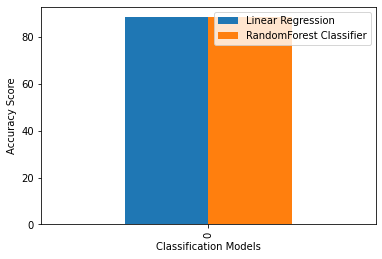

In [150]:
#Visualize the accuarcy performance
accuracy_dict = {"Linear Regression": round(grid_search_logistic_regression.score(x_test, y_test)*100,2),
                 "RandomForest Classifier": round(randomForest_classifier_gs.score(x_test, y_test)*100,2)}
accuracy_df = pd.DataFrame(accuracy_dict, index=[0])
plot = accuracy_df.plot(kind="bar")
plot.set_xlabel("Classification Models")
plot.set_ylabel("Accuracy Score");

### Evaluation Metrics

Now I'm gonna cover the evaluation metrics for a classification model for the Linear regression model(As both perform equally well).
Included are:

* Accuracy (for completeness)
* Precision
* Recall
* F1
* ROC curve
<!-- * Confusion Matrix -->
* Feature importance

#### Accuracy, Precision, Recall , F1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


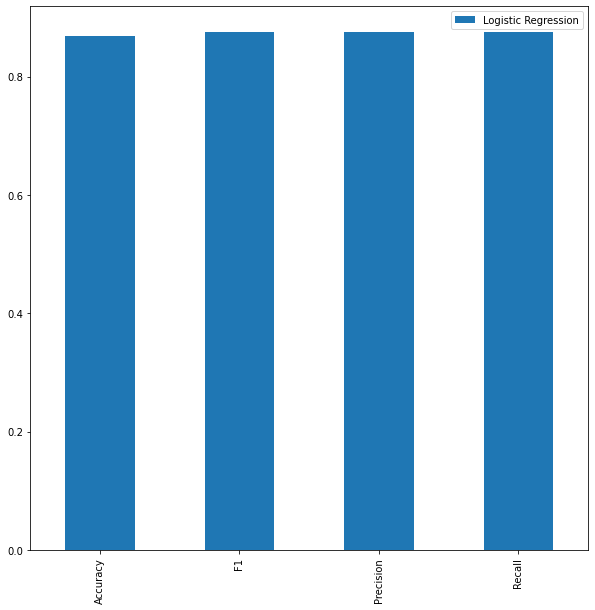

In [21]:
#First instantiate the two models with the best hyperparameter values
np.random.seed(42)

logistic_regression = LogisticRegression(verbose=2,
                                       multi_class='multinomial',
                                       max_iter=50,
                                       intercept_scaling=1,
                                       fit_intercept=True,
                                       dual=False,
                                       C=1)

logistic_regression.fit(x_train, y_train)

logistic_acc = linear_regression.score(x_test,y_test)

#Let the model make predictions
y_preds_logistic_regression = linear_regression.predict(x_test)

#Evaluate the predictions
logistic_regr_prec = precision_score(y_test, y_preds_logistic_regression)

logistic_regr_rec = recall_score(y_test, y_preds_logistic_regression)

logistic_regr_f1 = f1_score(y_test, y_preds_logistic_regression)

metric_log_reg = {"Accuracy": logistic_acc,
                  "Precision": logistic_regr_prec,
                  "Recall": logistic_regr_rec,
                  "F1": logistic_regr_f1}

compare_metrics = pd.DataFrame({"Logistic Regression": metric_log_reg})
    
compare_metrics.plot(kind="bar", figsize=(10,10));

#### ROC Curve


In [24]:
#define a function that plots a ROC curve
# Now it's time to visualize the frp and trp metrics
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="red", label="ROC")
    #Plot line no predicitve power (baseline, guessing a label)
    plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="Just guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC)")
    plt.legend()

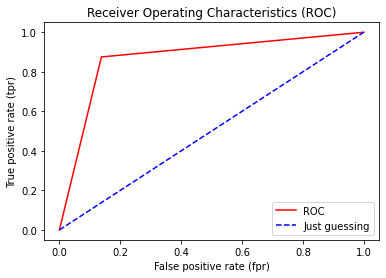

In [25]:
#Get relevant values for the roc_cruve and plot it
fpr_logistic_regr, tpr_logistic_regr, thresholds = roc_curve(y_test, y_preds_logistic_regression)
plot_roc_curve(fpr_logistic_regr, tpr_logistic_regr)

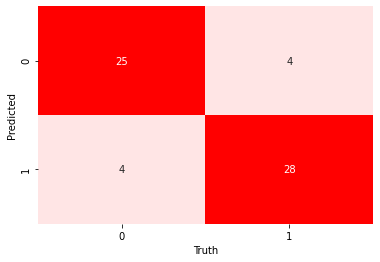

In [26]:
#Create a confusion matrix 
confusion_matrix_forest = confusion_matrix(y_test, y_preds_logistic_regression)
confusion_matrix_forest
sns.heatmap(confusion_matrix_forest, fmt=".2g", annot=True, cmap=sns.light_palette("red"), cbar=False)
plt.xlabel("Truth")
plt.ylabel("Predicted");

#### Feature importance

In [27]:
#Check out the correlation coefficients of the features to the target variable for the logistic regression model
logistic_regression.coef_

array([[ 0.00389075, -0.5845964 ,  0.40958886, -0.00388618, -0.00125935,
        -0.0071015 ,  0.25169496,  0.01450115, -0.40365383, -0.31569815,
         0.26963529, -0.44974838, -0.56977153]])

In [28]:
#Transform the feature importance with the feature names into a dictionary
feature_importance_dict = dict(zip(df.columns, list(logistic_regression.coef_[0])))
feature_importance_dict

{'age': 0.0038907546636386264,
 'sex': -0.5845964033299849,
 'cp': 0.4095888581352361,
 'trestbps': -0.0038861756776984602,
 'chol': -0.0012593541689730416,
 'fbs': -0.007101496422656094,
 'restecg': 0.2516949619397862,
 'thalach': 0.014501147869003906,
 'exang': -0.4036538337731417,
 'oldpeak': -0.31569814545187663,
 'slope': 0.2696352851937456,
 'ca': -0.4497483837053611,
 'thal': -0.5697715293924592}

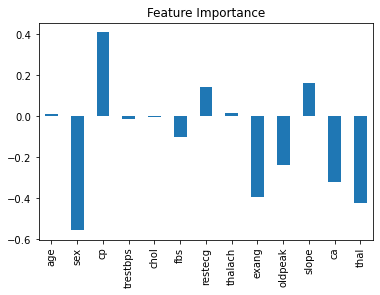

In [266]:
#Visualize the feature importance
feature_df =pd.DataFrame(feature_importance_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [33]:
#Save the model as a binary python object
from pickle import dump,load
dump(logistic_regression, open("../model/heart_disease_classifier_model", "wb"))